In [36]:
%matplotlib inline

import os, sys
sys.path.append('../../')
from utils import plot_psd, nmse
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

Determine experiments parameters

In [37]:
seed_0 = 964
epochs = 1500
exp_num = 5
methods = ['mnm_lev_marq', 'newton_lev_marq', 'cubic_newton', 'simple_cubic_newton']

In order to plot reproduced results of simulations uncomment reproduced = "reproduced_".
In order to plot results of simulations, provided by authors uncomment reproduced = "".

In [38]:
# reproduced = "reproduced_"
reproduced = ""

Determine plot parameters

In [39]:
linewidth = 1
fontsize = 13
xlabel = 'iterations'
ylabel = 'NMSE, dB'
legend = ["LM-MNM", "LM-NM", "CNM", "CMNM"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:purple"]
start_points = ["complex", "real", "imag"]
yticks_expanded = np.arange(-10, -15, -0.5)
yticks_whole = np.arange(-16, 2, 2)
ylim_expanded = [-15, -10]
ylim_whole = [-15, 1]
yticks = [yticks_whole, yticks_expanded]
ylim = [ylim_whole, ylim_expanded]
figsize=(16, 6)
shade_param = 0.15

Plot Learning mean, min-max range learning curves for each of the considered training algorithms: LM-MNM, LM-NM, CNM, CMNM, - and for each of the starting points purely real, purely imaginary and complex.

Learning curves corresponding to complex starting points:


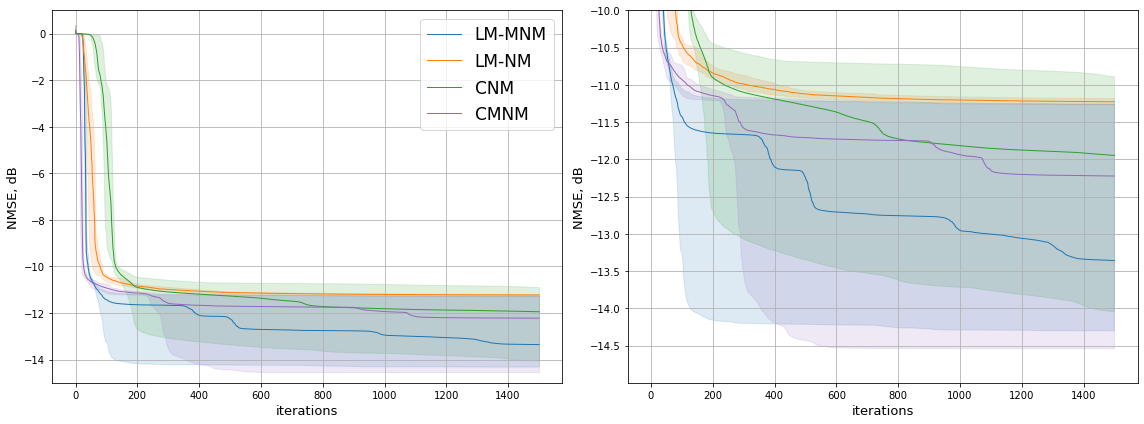

Learning curves corresponding to real starting points:


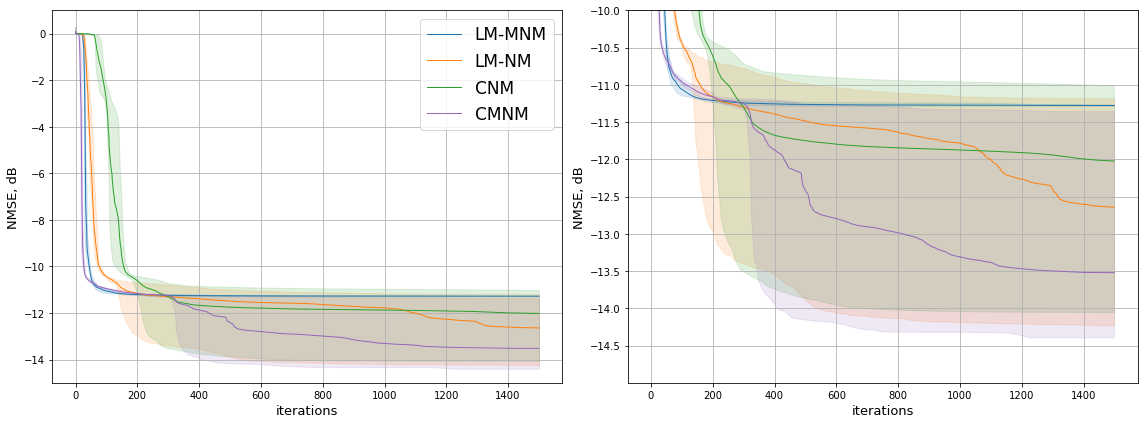

Learning curves corresponding to imag starting points:


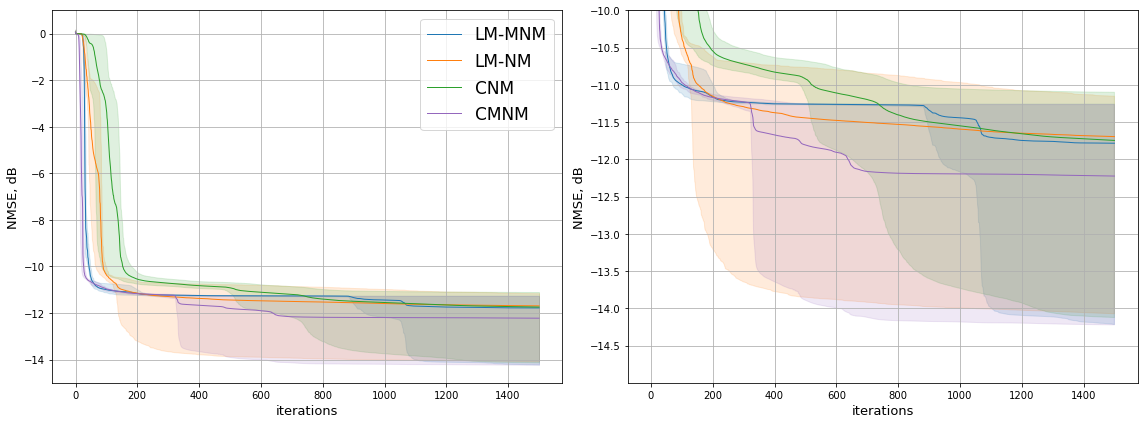

In [40]:
# Function to calculate min-max range curves and mean curves from NMSE curves
def calc_stat_from_nmse(curve, func):
    return 10*np.log10(func(10**(curve/10), axis=0))

lc_all = []
for start_p in start_points:
    lc_train = np.zeros((len(methods), exp_num, epochs + 1))
    lc_aver = np.zeros((len(methods), epochs + 1))
    lc_min = np.zeros((len(methods), epochs + 1))
    lc_max = np.zeros((len(methods), epochs + 1))
    
    for j_method, method in enumerate(methods):
        for exp in range(exp_num):
            exp_name = reproduced + f"paper_exp_{exp}_seed_{seed_0 + exp}_{start_p}_start_{method}_4_channels_3_3_3_1_ker_size_3_3_3_3_act_sigmoid_1500_epochs"
            add_folder = os.path.join(reproduced + "results")
            curr_path = os.getcwd()
            load_path = os.path.join(curr_path, add_folder, exp_name)
            # Plot learning curve for quality criterion
            lc_train[j_method, exp, :] = np.load(os.path.join(load_path, "lc_qcrit_train_" + exp_name + ".npy"))[:epochs + 1]

        lc_aver[j_method, :] = calc_stat_from_nmse(lc_train[j_method, :, :], np.mean)
        lc_min[j_method, :] = calc_stat_from_nmse(lc_train[j_method, :, :], np.min)
        lc_max[j_method, :] = calc_stat_from_nmse(lc_train[j_method, :, :], np.max)

    print(f"Learning curves corresponding to {start_p} starting points:")
    fig, ax = plt.subplots(1, 2, figsize=figsize)

    for i_graph in range(2):
        for i_method, method in enumerate(methods):
            ax[i_graph].fill_between(
                range(epochs + 1), lc_min[i_method, :], lc_max[i_method, :], 
                color=colors[i_method], alpha=shade_param,
            )
            ax[i_graph].plot(
                lc_aver[i_method, :], color=colors[i_method], linestyle='solid', 
                label=legend[i_method], linewidth=linewidth, 
            )

        ax[i_graph].set_xlabel(xlabel, fontsize=fontsize)
        ax[i_graph].set_ylabel(ylabel, fontsize=fontsize)
        ax[i_graph].set_yticks(yticks[i_graph])
        ax[i_graph].set_ylim(ylim[i_graph])
        ax[i_graph].grid()

        if i_graph == 0:
            ax[i_graph].legend(fontsize=fontsize + 4, loc='upper right')

    lc_all.append(lc_train)

    plt.tight_layout()
    plt.show()


Compare convergence speed of CMNM and LM-MNM for CV-CNN and LM-NM for RV-CNN

In [41]:
# Consider learning curves which correspond to CV-CNN
lc_train_cvcnn = np.array(lc_all)
# Leave learning curves, which correspond to LM-MNM and CMNM
lc_train_cvcnn = lc_train_cvcnn[:, ::3, ...]
# Leave learning curves which correspond only to complex staring points
# lc_train_cvcnn = lc_train_cvcnn[0, ...]

Determine plot parameters

In [42]:
methods_rvcnn = ["newton_lev_marq"]
methods_cvcnn = ['mnm_lev_marq', 'simple_cubic_newton']
legend = ["RV-CNN, LM-NM", "CV-CNN, LM-MNM", "CV-CNN, CMNM"]
colors = ["tab:orange", "tab:blue", "tab:purple"]

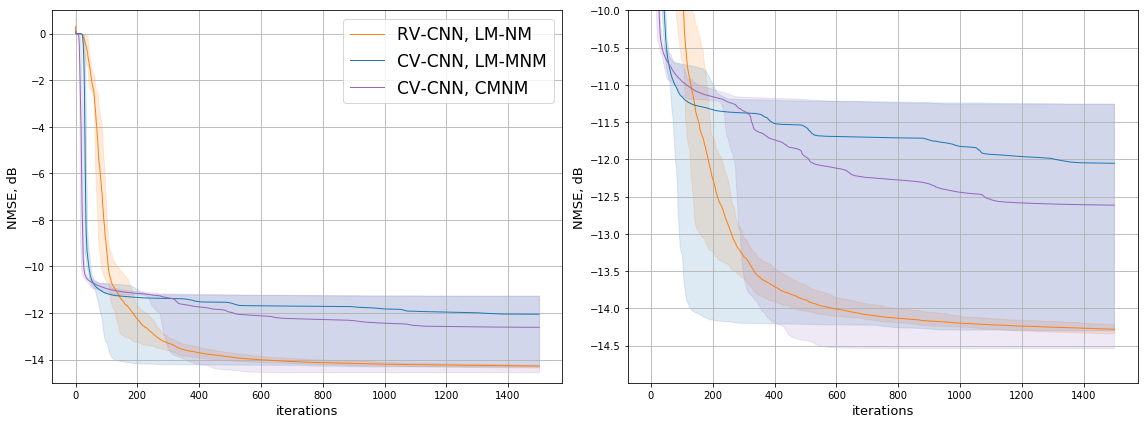

In [43]:
lc_train_rvcnn = np.zeros((len(methods), exp_num, epochs + 1))
lc_aver, lc_min, lc_max = [], [], []

# Function to calculate min-max range curves and mean curves from NMSE curves
def calc_stat_from_nmse(curve, func):
    return 10*np.log10(func(10**(curve/10), axis=0))

# Load and calculate, min, max, average learning curves for RV-CNN
for j_method, method in enumerate(methods_rvcnn):
    for exp in range(exp_num):
        exp_name = reproduced + f"paper_exp_{exp}_seed_{seed_0 + exp}_{methods_rvcnn[0]}_4_channels_6_5_5_2_ker_size_3_3_3_3_act_sigmoid_1500_epochs"
        add_folder = os.path.join(reproduced + "results")
        curr_path = os.path.join(os.getcwd(), "..", "RVCNN")
        load_path = os.path.join(curr_path, add_folder, exp_name)
        # Plot learning curve for quality criterion
        lc_train_rvcnn[j_method, exp, :] = np.load(os.path.join(load_path, "lc_qcrit_train_" + exp_name + ".npy"))[:epochs + 1]

    lc_aver.append(calc_stat_from_nmse(lc_train_rvcnn[j_method, :, :], np.mean))
    lc_min.append(calc_stat_from_nmse(lc_train_rvcnn[j_method, :, :], np.min))
    lc_max.append(calc_stat_from_nmse(lc_train_rvcnn[j_method, :, :], np.max))

# Function to calculate min-max range curves and mean curves from NMSE curves
def calc_stat_from_nmse(curve, func):
    return 10*np.log10(func(10**(curve/10), axis=(0, 1)))

# Calculate, min, max, average learning curves for CV-CNN
for j_method, method in enumerate(methods_cvcnn):
    lc_aver.append(calc_stat_from_nmse(lc_train_cvcnn[:, j_method, :, :], np.mean))
    lc_min.append(calc_stat_from_nmse(lc_train_cvcnn[:, j_method, :, :], np.min))
    lc_max.append(calc_stat_from_nmse(lc_train_cvcnn[:, j_method, :, :], np.max))
lc_aver = np.array(lc_aver)
lc_min = np.array(lc_min)
lc_max = np.array(lc_max)

fig, ax = plt.subplots(1, 2, figsize=figsize)

for i_graph in range(2):
    for i_method in range(len(methods_cvcnn) + len(methods_rvcnn)):
        ax[i_graph].fill_between(
            range(epochs + 1), lc_min[i_method, :], lc_max[i_method, :], 
            color=colors[i_method], alpha=shade_param,
        )
        ax[i_graph].plot(
            lc_aver[i_method, :], color=colors[i_method], linestyle='solid', 
            label=legend[i_method], linewidth=linewidth, 
        )

    ax[i_graph].set_xlabel(xlabel, fontsize=fontsize)
    ax[i_graph].set_ylabel(ylabel, fontsize=fontsize)
    ax[i_graph].set_yticks(yticks[i_graph])
    ax[i_graph].set_ylim(ylim[i_graph])
    ax[i_graph].grid()

    if i_graph == 0:
        ax[i_graph].legend(fontsize=fontsize + 4, loc='upper right')

plt.tight_layout()
plt.show()


Calculate resulting performance values for each model and training method

In [44]:
methods_rvcnn = ["newton_lev_marq", 'cubic_newton']
methods_cvcnn = ['mnm_lev_marq', 'newton_lev_marq', 'cubic_newton', 'simple_cubic_newton']
names_rvcnn = ["RV-CNN, LM-NM", "RV-CNN, CNM"]
names_cvcnn = ["CV-CNN, LM-MNM", "CV-CNN, LM-NM", "CV-CNN, CNM", "CV-CNN, CMNM"]

# Consider learning curves which correspond to CV-CNN
lc_train_cvcnn = np.array(lc_all)
# Leave learning curves which correspond only to complex staring points
# lc_train_cvcnn = lc_train_cvcnn[0, ...]

lc_aver, lc_min, lc_max = [], [], []
# Calculate, min, max, average learning curves for CV-CNN
for j_method, method in enumerate(methods_cvcnn):
    lc_aver.append(calc_stat_from_nmse(lc_train_cvcnn[:, j_method, :, :], np.mean))
    lc_min.append(calc_stat_from_nmse(lc_train_cvcnn[:, j_method, :, :], np.min))
    lc_max.append(calc_stat_from_nmse(lc_train_cvcnn[:, j_method, :, :], np.max))
lc_aver = np.array(lc_aver)
lc_min = np.array(lc_min)
lc_max = np.array(lc_max)

# Best performance
perform_aver = lc_aver[:, -1]
perform_min = lc_min[:, -1]

for p_aver, p_min, name in zip(perform_aver, perform_min, names_cvcnn):
    print(f"{name}: average NMSE: {p_aver:.2f}, best NMSE: {p_min:.2f}")

CV-CNN, LM-MNM: average NMSE: -12.05, best NMSE: -14.30
CV-CNN, LM-NM: average NMSE: -11.82, best NMSE: -14.23
CV-CNN, CNM: average NMSE: -11.90, best NMSE: -14.12
CV-CNN, CMNM: average NMSE: -12.62, best NMSE: -14.54
